Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5466 - loss: 0.9877 - val_accuracy: 0.7250 - val_loss: 0.7754
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7801 - loss: 0.6895 - val_accuracy: 0.8200 - val_loss: 0.5157
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8372 - loss: 0.4706 - val_accuracy: 0.8950 - val_loss: 0.3630
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9015 - loss: 0.3384 - val_accuracy: 0.9150 - val_loss: 0.2787
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9307 - loss: 0.2697 - val_accuracy: 0.9200 - val_loss: 0.2288
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9338 - loss: 0.2356 - val_accuracy: 0.9300 - val_loss: 0.1969
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9605 - loss: 0.1789 - val_accuracy: 0.9300 - val_loss: 0.1773
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9498 - loss: 0.1639 - val_accuracy: 0.9250 - val_lo

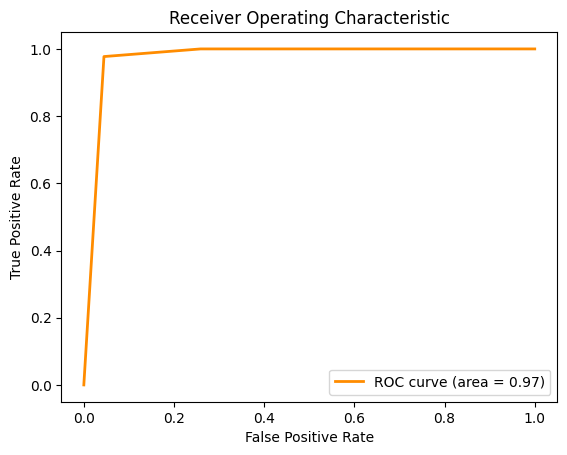

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc

# Load the dataset
df = pd.read_csv("house_price.csv")

# Convert House Price into categories
def categorize_price(price):
    if price < 300000:
        return "Low"
    elif price < 700000:
        return "Medium"
    else:
        return "High"

df["Price_Category"] = df["House_Price"].apply(categorize_price)

# Encode categorical labels
label_encoder = LabelEncoder()
df["Price_Category"] = label_encoder.fit_transform(df["Price_Category"])

# Select features and target
features = df[["Square_Footage", "Num_Bedrooms", "Num_Bathrooms", "Year_Built", "Lot_Size", "Garage_Size", "Neighborhood_Quality"]]
target = df["Price_Category"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Classification Model
cls_model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(3, activation="softmax")  # 3 classes: Low, Medium, High
])
cls_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = cls_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

# Evaluate the model
y_pred = np.argmax(cls_model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
